In [67]:
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv("shark.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         97 non-null     object 
 1   Year         99 non-null     float64
 2   Type         100 non-null    object 
 3   Country      100 non-null    object 
 4   Area         100 non-null    object 
 5   Activity     96 non-null     object 
 6   Sex          95 non-null     object 
 7   Age          65 non-null     float64
 8   Fatal (Y/N)  100 non-null    object 
dtypes: float64(2), object(7)
memory usage: 7.2+ KB
None


In [69]:
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['Date', 'Type', 'Country', 'Area', 'Activity', 'Sex', 'Fatal (Y/N)']
Numerical columns : ['Year', 'Age']


In [70]:
# check unique values
print(df[cat_col].nunique())
print("\n")
print(df[num_col].nunique())


Date           94
Type            4
Country         1
Area           11
Activity       38
Sex             2
Fatal (Y/N)     3
dtype: int64


Year    59
Age     36
dtype: int64


In [71]:
# start removing unwanted values
print(df['Fatal (Y/N)'].unique()) # We can remove UNKOWN
print(df['Type'].unique()) # We can remove "Invalid" and 'Watercraft"
df1 = df[df['Fatal (Y/N)'] != "UNKNOWN"]
df2 = df1[(df1['Type'] != "Invalid") & (df1['Type'] != "Watercraft")]
print(df2.shape)
print(df2['Type'].unique())

['N' 'UNKNOWN' 'Y']
['Unprovoked' 'Watercraft' 'Invalid' 'Provoked']
(86, 9)
['Unprovoked' 'Provoked']


In [72]:
# Check for the amount of missing data
print(round((df2.isnull().sum()/df2.shape[0])*100,2))
print("\n")
# Age have a large amount of missing data, followed by Sex, Activity, date, and year
print(df2['Age'].describe()) # Since there are outlines, I will use median age instead

Date            2.33
Year            1.16
Type            0.00
Country         0.00
Area            0.00
Activity        2.33
Sex             2.33
Age            32.56
Fatal (Y/N)     0.00
dtype: float64


count    58.000000
mean     24.000000
std      12.544657
min       5.000000
25%      14.250000
50%      21.000000
75%      28.000000
max      68.000000
Name: Age, dtype: float64


In [73]:
# Using median imoutation to fill 
df3 = df2.copy()
df3['Age']= df2['Age'].fillna(df2.Age.median())
print(df3.isnull().sum())
print("\n")
print(round((df3.isnull().sum()/df3.shape[0])*100,2))
print("\n")
print(df3.shape)

Date           2
Year           1
Type           0
Country        0
Area           0
Activity       2
Sex            2
Age            0
Fatal (Y/N)    0
dtype: int64


Date           2.33
Year           1.16
Type           0.00
Country        0.00
Area           0.00
Activity       2.33
Sex            2.33
Age            0.00
Fatal (Y/N)    0.00
dtype: float64


(86, 9)


In [74]:
# Given most shark attack victims are male, I'm getting to assumt the 2 missing values are also male
print(df3.Sex.value_counts())
df3['Sex']= df3['Sex'].fillna("M")
print("\nafter:")
print(df3.Sex.value_counts())

Sex
M    72
F    12
Name: count, dtype: int64

after:
Sex
M    74
F    12
Name: count, dtype: int64


In [75]:
# Find the entry where the year is missing
print(df3[df3['Year'].isna()]) # Since both date and year are missing, I have to drop this row
df4 = df3[~df3['Year'].isna()]
print(round((df4.isnull().sum()/df3.shape[0])*100,2))

   Date  Year        Type Country     Area  Activity Sex   Age Fatal (Y/N)
97  NaN   NaN  Unprovoked     USA  Florida  Canoeing   M  21.0           Y
Date           1.16
Year           0.00
Type           0.00
Country        0.00
Area           0.00
Activity       2.33
Sex            0.00
Age            0.00
Fatal (Y/N)    0.00
dtype: float64


In [76]:
# Crop the Date to only month
df4['Date'] = pd.to_datetime(df4['Date'])
# Extract the month from the 'date' column
df4['Date'] = df4['Date'].dt.month
print(df4['Date'].value_counts())

Date
10.0    18
7.0     12
6.0     11
8.0     10
9.0      9
5.0      6
11.0     5
3.0      3
2.0      3
1.0      3
4.0      2
12.0     2
Name: count, dtype: int64


/var/folders/s6/139t539x26v08f_7wk7wfbd80000gn/T/ipykernel_8595/2112100353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Date'] = pd.to_datetime(df4['Date'])
/var/folders/s6/139t539x26v08f_7wk7wfbd80000gn/T/ipykernel_8595/2112100353.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Date'] = df4['Date'].dt.month


In [77]:
# Since October is the month with the most shark attacl, I will assign the missing row to october
print(df4[df4['Date'].isna()])
df5 = df4.copy()
df5['Date']= df4['Date'].fillna(10.0)
print(round((df5.isnull().sum()/df5.shape[0])*100,2))

    Date    Year        Type Country     Area          Activity Sex   Age  \
90   NaN  1899.0  Unprovoked     USA  Florida  Hunting crayfish   M  21.0   

   Fatal (Y/N)  
90           N  
Date           0.00
Year           0.00
Type           0.00
Country        0.00
Area           0.00
Activity       2.35
Sex            0.00
Age            0.00
Fatal (Y/N)    0.00
dtype: float64


In [78]:
# Now to have some activities missing
print(df5[df5['Activity'].isna()])
print(df5['Activity'].value_counts()) 

    Date    Year        Type Country            Area Activity Sex   Age  \
4    3.0  2021.0  Unprovoked     USA         Florida      NaN   F  16.0   
82   8.0  1945.0  Unprovoked     USA  North Carolina      NaN   M  21.0   

   Fatal (Y/N)  
4            N  
82           Y  
Activity
Surfing                                   31
Swimming                                  14
Fishing                                    5
Bathing                                    3
Boogie boarding                            2
Standing                                   2
Spearfishing                               2
Swimming 3 miles offshore                  1
In waist-deep water                        1
Scuba diving (but on surface)              1
Escaping from Alacatraz                    1
Floating in inner tube                     1
Surfing (sitting on his board)             1
Scuba diving                               1
Swimming with dog near canning factory     1
Hoisting shark aboard fishing boat     

In [ ]:
# There's a lot of activities written differently, I will rename them
keyword_swim = ["Swimming", "Wading"]

keyword_dive = []

In [79]:
# Since surfing is the most common one, I will code the other missing cases as surfing
df5['Activity'] = df5['Activity'].fillna("Surfing")
print(df5.isna().any()) # all clean!

df5.to_csv('small_shark_data_clean.csv', index=False)

Date           False
Year           False
Type           False
Country        False
Area           False
Activity       False
Sex            False
Age            False
Fatal (Y/N)    False
dtype: bool


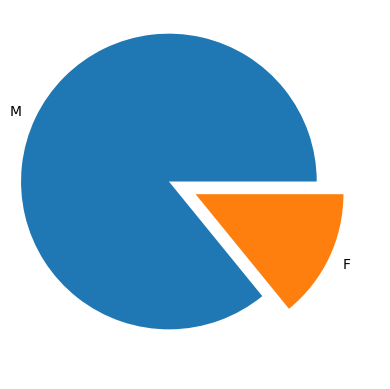

In [80]:
# Data visualization

# box plot
plt.boxplot(df5['Age'])
# plt.show()

# pie chart
mylabels = ["M", "F"]
plt.pie(df5['Sex'].value_counts(), labels=mylabels, explode = [0.2, 0])
plt.show()